# Project 2 - Source coding, data compression and channel coding

The goal of this second project is to apply some of the principles seen in the lectures about source coding, data compression and channel coding. We ask you to write a brief report (pdf format) collecting your answers to the different questions. All codes must be written in Python inside this Jupyter. Note that you can not change the content of locked cells or import any extra Python library than the ones already imported (numpy).

## Implementation

In this project, you will need to use implement source coding algorithms to answer several questions. Therefore, in this first part, you are asked to write several functions that implement two of the  algorithms seen in the theoretical lectures and one new algorithm described in the project statement. Remember that you need to fill in this Jupyter Notebook to answer these questions. Pay particular attention to the required input and output format of each function.

In [25]:
# [Locked Cell] You can not import any extra Python library in this Notebook.
import numpy as np

### Question 1
Implement a function that returns a binary Huffman code for a given probability distribution. Give the main steps of your implementation. Verify your code on Exercise 7 of the second exercise session (TP2), and report the output of your code for this example. Explain how to extend your function to generate a Huffman code of any (output) alphabet size. 


In [26]:
# Find indices of the two nodes with smallest probabilities
def find_min_probability_nodes(nodes):
    min1 = min2 = float('inf')
    min1_idx = min2_idx = -1

    # Iterate through nodes to find smallest probabilities
    for idx, node in enumerate(nodes):
        if node[0] < min1:
            min2 = min1
            min2_idx = min1_idx
            min1 = node[0]
            min1_idx = idx
        elif node[0] < min2:
            min2 = node[0]
            min2_idx = idx

    return min1_idx, min2_idx

# Build Huffman tree
def huffman_tree(probability_dict):
    # Create list of nodes sorted by probability and symbol
    nodes = sorted([(prob, symbol) for symbol, prob in probability_dict.items()], key=lambda x: (-x[0], x[1]))

    # Combine nodes with smallest probabilities until only one node left
    while len(nodes) > 1:
        min1_idx, min2_idx = find_min_probability_nodes(nodes)
        a = nodes[min1_idx]
        b = nodes[min2_idx]

        combined_node = (a[0] + b[0], (a[1], b[1]))
        nodes[min1_idx] = combined_node
        nodes.pop(min2_idx)

    return nodes[0]

# Recursively generate Huffman codes
def huffman_codes_recursive(tree, prefix=''):
    if isinstance(tree, str):
        return {tree: prefix}
    else:
        left, right = tree
        codes = {}
        codes.update(huffman_codes_recursive(left, prefix + '0'))
        codes.update(huffman_codes_recursive(right, prefix + '1'))
        return codes

def Huffman_code(probability_dict):
    """
    Create the Huffman code for given probabilities  
    
    Arguments:
    ----------
    probability_dict:
      - keys: symbol as character or string
      - values: probability of the symbol as a float or double
      Example: {"A": 0.25, "B":0.5,"C":0.125,"D":0.125}
    
    Return:
    -------
    - codewords: dictionary with the name and the corresponding codeword 
      - keys: symbol as character or string
      - values: associated codeword as a character or a string    
      Example: {"A": "10", "B":"0","C":"111","D":"110"}
    
    """  

    tree = huffman_tree(probability_dict) # Build the Huffman tree
    codewords = huffman_codes_recursive(tree[1]) # Generate the Huffman codes

    # Sort keys in ascending order --> needed ?
    sorted_codewords = {symbol: codewords[symbol] for symbol in sorted(codewords)}

    return sorted_codewords

Example from statement above 

In [15]:
probability_vector = np.array([0.25, 0.5, 0.125, 0.125])
probability_dict = {f'S{idx+1}': prob for idx, prob in enumerate(probability_vector)}
huffman_codes = Huffman_code(probability_dict)
print(huffman_codes)

{'S1': '10', 'S2': '0', 'S3': '110', 'S4': '111'}


TP2 - Exercise 7:

Let a source be stationary and memoryless emitting six different symbols. Their probabilities are given by the following vector: P(S) = [0.05 0.10 0.15 0.15 0.2 0.35]. Use the Huffman algorithm to find a binary code for that source. 

In [16]:
probability_vector = np.array([0.05, 0.10, 0.15, 0.15, 0.2, 0.35])
probability_dict = {f'S{idx+1}': prob for idx, prob in enumerate(probability_vector)}
huffman_codes = Huffman_code(probability_dict)
print(huffman_codes)

{'S1': '000', 'S2': '001', 'S3': '100', 'S4': '101', 'S5': '01', 'S6': '11'}


### Question 2

Given a sequence of symbols, implement a function that returns a dictionary and the encoded sequence using the on-line Lempel-Ziv algorithm (see State of the art in data compression, slide 50/53). Reproduce and report the example given in the course. 

In [17]:
def LZ_online(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols  
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    
    Return:
    -------
    - dictionary : the computed dictionnary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized adress with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """
    
    dictionary = {'': (0, '')}
    encoded_sequence = ''
    buffer = ''
    next_code = 1

    for symbol in sequence:
        buffer += symbol

        if buffer not in dictionary:
            # Get prefix
            prefix = buffer[:-1]

            # Calculate number of bits required
            num_bits = int(np.ceil(np.log2(next_code)))

            # Add new entry with index and binary address with appended symbol
            dictionary[buffer] = (next_code, (format(dictionary[prefix][0], f'0{num_bits}b') if next_code > 1 else '') + buffer[-1])
            
            # Add encoded symbol
            encoded_sequence += dictionary[buffer][1]
            
            next_code += 1
            buffer = ''

    return dictionary, encoded_sequence

Example from statement

In [18]:
sequence = '010010'
dictionary, encoded_sequence = LZ_online(sequence)
print('Dictionary:', dictionary)
print('Encoded sequence:', encoded_sequence)

Dictionary: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
Encoded sequence: 001010100


Example given in the course (see State of the art in data compression, slide 50/53)

In [19]:
sequence = '1011010100010'
dictionary, encoded_sequence = LZ_online(sequence)
print('Dictionary:', dictionary)
print('Encoded sequence:', encoded_sequence)

Dictionary: {'': (0, ''), '1': (1, '1'), '0': (2, '00'), '11': (3, '011'), '01': (4, '101'), '010': (5, '1000'), '00': (6, '0100'), '10': (7, '0010')}
Encoded sequence: 100011101100001000010


### Question 4

Implement a function that returns the encoded sequence using the LZ77 algorithm as described by the algorithm below given an input string and a sliding window size l. Reproduce the example given in Figure 2 with window_size=7.

In [27]:
def LZ77(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """

    encoded_sequence = []
    window = ''
    input_string = sequence
    
    while input_string:
        max_prefix_length = 0
        max_prefix_offset = 0
        prefix_char = input_string[0]
        
        # Iterate through window to find longest prefix
        for i in range(len(window)):
            prefix_length = 0
            while (prefix_length < len(input_string) and window[i + prefix_length] == input_string[prefix_length]):
                prefix_length += 1
                if i + prefix_length >= len(window):
                    break
            
            # Update maximum prefix information if longer prefix found
            if prefix_length >= max_prefix_length:
                max_prefix_length = prefix_length
                max_prefix_offset = len(window) - i
                prefix_char = input_string[prefix_length] if prefix_length < len(input_string) else ''
        
        # If prefix found, set d, p, and c accordingly
        if max_prefix_length > 0:
            d = max_prefix_offset
            p = max_prefix_length
            c = prefix_char
        else:
            d = 0
            p = 0
            c = input_string[0]
        
        encoded_sequence.append((d, p, c))
        
        # Shift the sliding window
        shift_amount = p + 1
        window = window[-window_size + shift_amount:] + input_string[:shift_amount]
        input_string = input_string[shift_amount:]
    
    return encoded_sequence

Example given in Figure 2 with window_size=7

In [28]:
sequence = 'abracadabrad'
encoded_sequence = LZ77(sequence)
print('Encoded sequence:', encoded_sequence)

Encoded sequence: [(0, 0, 'a'), (0, 0, 'b'), (0, 0, 'r'), (3, 1, 'c'), (2, 1, 'd'), (7, 4, 'd')]


In [22]:
# [Locked Cell] Evaluation of your functions by the examiner. 
# You don't have access to the evaluation, this will be done by the examiner.
# Therefore, this cell will return nothing for the students.
import os
if os.path.isfile("private_evaluation.py"):
    from private_evaluation import unit_tests
    unit_tests(Huffman_code, LZ_online, LZ77)

## Source coding and reversible (lossless) data compression


### Question 5

Write a function to read and display both images (you may use external libraries). What is the number of symbols required to represent all possible images in both image representations? What is the length (in bytes) of both files?

In [29]:
from io import BytesIO
from PIL import Image

def display_image(file):
    with open(file, 'r') as file:
        lines = file.readlines()

    # Conversion of hexadecimal numbers in integers
    values = [int(value, 16) for line in lines for value in line.split()]

    image = Image.new('L', (512, 512))

    for i, value in enumerate(values):
        x = i % 512
        y = i // 512
        image.putpixel((x, y), value)

    image.show()
    
import binascii

def display_image_png(file):
    
    # File lecture and conversion of hexadecimal numbers in bytes 
    with open(file, 'r') as f:
        octets_hex = f.read().split()
        
    octets = bytes.fromhex(''.join(octets_hex))

    # Image creation 
    image = Image.open(BytesIO(octets))

    image.show()

In [30]:
display_image('data/pixel.txt')
display_image_png('data/PNG.txt')

### Question 6

Estimate the marginal probability distribution of all symbols (in hexadecimal representation) from the given PNG representation sequence of the image, and determine the corresponding binary Huffman code and the encoded PNG sequence. Give the total length of the encoded PNG sequence and the compression rate.

In [32]:
#Counting the numbers of occurence of hexadecimal numbers in the "PNG.txt" file
#Code inspired from https://www.geeksforgeeks.org/python-count-occurrences-of-each-word-in-given-text-file/

# Open the file in read mode
png = open("data/PNG.txt", "r")

# Create an empty dictionary
d1 = dict()

# Loop through each line of the file
for line in png:
    # Remove the leading spaces and newline character
    line = line.strip()

    # Convert the characters in line to
    # lowercase to avoid case mismatch
    line = line.lower()

    # Split the line into words
    hexas = line.split(" ")
 

    # Iterate over each word in line
    for hexa in hexas:
        # Check if the word is already in dictionary
        if hexa in d1:
            # Increment count of word by 1
            d1[hexa] = d1[hexa] + 1
        else:
            # Add the word to dictionary with count 1
            d1[hexa] = 1
print("Number of occurence of each symbol : ")
print(d1)

Number of occurence of each symbol : 
{'89': 494, '50': 544, '4e': 571, '47': 566, '0d': 659, '0a': 628, '1a': 545, '00': 1803, '49': 596, '48': 519, '44': 528, '52': 613, '02': 1024, '08': 824, 'd1': 550, '13': 589, '8b': 576, '26': 595, '04': 917, '67': 515, '41': 585, '4d': 559, 'b1': 605, '8f': 647, '0b': 657, 'fc': 728, '61': 553, '05': 761, '20': 824, '63': 569, '7a': 617, '80': 1175, '84': 574, 'fa': 586, 'e8': 506, '75': 541, '30': 754, 'ea': 560, '60': 839, '3a': 571, '98': 599, '17': 663, '70': 884, '9c': 663, 'ba': 520, '51': 622, '3c': 676, '62': 665, '4b': 492, 'ff': 837, '87': 625, 'cc': 511, 'bf': 680, '09': 612, '59': 565, '73': 565, 'c8': 531, 'e7': 653, 'ad': 552, '07': 925, '74': 554, '45': 569, '28': 669, '23': 475, '6b': 551, 'df': 690, '01': 1201, '6f': 614, '72': 576, '54': 599, 'cf': 675, 'a2': 532, '77': 673, '9a': 603, '78': 686, 'da': 501, 'ec': 570, 'bd': 627, '5d': 566, '1b': 584, 'e9': 615, 'b6': 532, '2e': 619, '36': 572, '56': 643, '5f': 615, '31': 691, 

In [33]:
# Marginal probability distribution of all symbols
d2 = d1.copy()
total = 160552
for key in d2.keys():
    d2[key] /= total

print("Probability distribution of png symbols :")
print(d2)

Probability distribution of png symbols :
{'89': 0.0030768847476207086, '50': 0.0033883103293636955, '4e': 0.003556480143504908, '47': 0.0035253375853306094, '0d': 0.004104589167372564, '0a': 0.003911505306691913, '1a': 0.003394538840998555, '00': 0.011230006477652101, '49': 0.0037121929343764013, '48': 0.003232597538492202, '44': 0.0032886541432059395, '52': 0.003818077632169017, '02': 0.006377995914096367, '08': 0.005132293587124421, 'd1': 0.0034256813991728535, '13': 0.0036685933529323833, '8b': 0.003587622701679207, '26': 0.003705964422741542, '04': 0.005711545169166376, '67': 0.003207683491952763, '41': 0.0036436793063929444, '4d': 0.0034817380038865914, 'b1': 0.003768249539090139, '8f': 0.004029847027754248, '0b': 0.004092132144102845, 'fc': 0.004534356470177886, '61': 0.003444366934077433, '05': 0.004739897354128258, '20': 0.005132293587124421, '63': 0.0035440231202351884, '7a': 0.003842991678708456, '80': 0.007318501170960188, '84': 0.0035751656784094874, 'fa': 0.00364990781802

In [34]:
#Binary Huffman code
huffman_codes_png = Huffman_code(d2)
print("Binary Huffman code : ")
print(huffman_codes_png)

Binary Huffman code : 
{'00': '1111011', '01': '1000000', '02': '0000100', '03': '0000001', '04': '11111000', '05': '11100011', '06': '11100110', '07': '11111010', '08': '11101111', '09': '10001110', '0a': '10100010', '0b': '10111001', '0c': '11100010', '0d': '10111011', '0e': '11100001', '0f': '11101010', '10': '11101101', '11': '01001000', '12': '01110011', '13': '01110111', '14': '10111100', '15': '10000011', '16': '01101010', '17': '10111110', '18': '11101011', '19': '10100011', '1a': '00101000', '1b': '01101101', '1c': '11011001', '1d': '01111010', '1e': '10001010', '1f': '11011111', '20': '11110000', '21': '00111111', '22': '01110001', '23': '111110110', '24': '10001011', '25': '01010101', '26': '01111011', '27': '01101000', '28': '11000011', '29': '00100011', '2a': '00100100', '2b': '00010110', '2c': '10110000', '2d': '00101111', '2e': '10011010', '2f': '01001001', '30': '11100000', '31': '11010011', '32': '01101001', '33': '111110010', '34': '01111100', '35': '01000000', '36': 

In [35]:
#Length of the encoded PNG file
length = 0

for key in d1.keys():
    length += d1[key]*len(huffman_codes_png[key]) 
print("Length of the encoded PNG file :")    
print(length)

Length of the encoded PNG file :
1282749


In [36]:
#Compression rate 

comp = 1284416/length
print("Compression rate : ")
print(comp)

Compression rate : 
1.0012995527573985


### Question 7

Give the expected average length for your Huffman code. Compare this value with (a) the empirical average length, and (b) theoretical bound(s). Justify.

In [37]:
# Expected average length
n_averaged = 0

for key in d2.keys():
    n_averaged += d2[key]*len(huffman_codes_png[key])

print("Expected average length : ")
print(n_averaged)

Expected average length : 
7.989617071104689


In [39]:
# Empirical average length
png_bis = open('data/PNG.txt', 'r').read()
huff_emp_avg_len = length/160552
print("Empirical average length of Huffman code: {:.5f}" .format(huff_emp_avg_len))

Empirical average length of Huffman code: 7.98962


In [40]:
# Entropy useful for theoretical bounds computation
def entropy(Px):
    """
    Computes the entropy from the marginal probability distribution. 
    Arguments:
    ----------
    - Px :  Marginal probability distribution of the random 
            variable X in a numpy array where Px[i]=P(X=i)
    Return:
    -------
    - The entropy of X (H(X)) as a number (integer, float or double).
    """
    return - Px @ np.log2(Px, where=(Px!=0)) # Px must be a numpy array otherwise the `where` argument in np.log2 won't correctly work

In [41]:
# Theoretical bounds
Px = np.array(list(d2.values()))
H_S = entropy(Px)
print(H_S)
left_bound = H_S/np.log2(2)
right_bound = left_bound + 1
print("Theoretical bounds : [{:.3f}, {:.3f}]" .format(left_bound, right_bound))

7.972177512181803
Theoretical bounds : [7.972, 8.972]


### Question 8

Plot the evolution of the empirical average length of the encoded PNG using your Huffman code for increasing input sequence lengths.

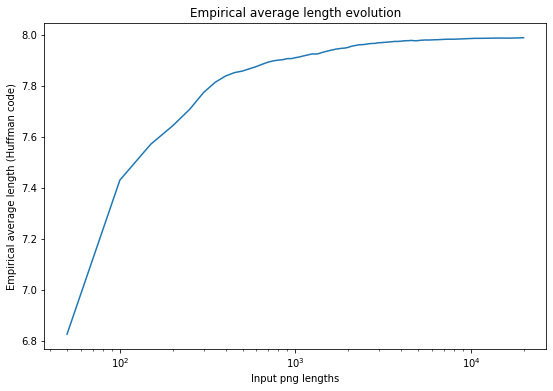

In [44]:
#Plot of the empirical average length

import matplotlib.pyplot as plt

input_lengths = [50*i for i in range(1,400)]
emp_lengths = np.zeros(len(input_lengths))
d_bis = dict()

for j in range(len(input_lengths)):
    
    with open("data/PNG.txt", "r") as f:
        lignes = []
        for i in range(input_lengths[j]):
            ligne = f.readline()
            lignes.append(ligne)

    for line in lignes:
        # Remove the leading spaces and newline character
        line = line.strip()

        # Convert the characters in line to
        # lowercase to avoid case mismatch
        line = line.lower()

        # Split the line into words
        hexas = line.split(" ")
    
        # Iterate over each word in line
        for hexa in hexas:
        # Check if the word is already in dictionary
            if hexa in d_bis:
                # Increment count of word by 1
                d_bis[hexa] = d_bis[hexa] + 1
            else:
                # Add the word to dictionary with count 1
                d_bis[hexa] = 1
    
    total = 8*input_lengths[j]
    d_prob = d_bis.copy()
    
    for key in d_bis.keys():
        d_bis[key] /= total

    huff_code = Huffman_code(d_bis)
 
    length_bis = 0

    for key in d_bis.keys():
        length_bis += d_prob[key]*len(huff_code[key]) 

    emp_lengths[j] = length_bis/total

plt.figure(figsize=(9,6))
plt.plot(input_lengths,emp_lengths)
plt.title('Empirical average length evolution')
plt.xlabel('Input png lengths')
plt.ylabel('Empirical average length (Huffman code)')
plt.xscale('log')
plt.savefig('Q8.pdf')    

### Question 9

Encode the PNG sequence using the on-line Lempel-Ziv algorithm. Give the total length of the encoded sequence and the compression rate.

In [ ]:
#LZ_online algorithm modified to work with hexadecimal keys

def LZ_online_hexa(sequence):
    """
    The on-line Lempel-Ziv algorithm given a sequence of symbols  
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    
    Return:
    -------
    - dictionary : the computed dictionary in the form:
        - keys: symbol as character or string
        - values: associated codeword as a tuple composed of the entry index (integer) and a binarized address with one appended symbol (character or string)
        Example: {'': (0, ''), '0': (1, '0'), '1': (2, '01'), '00': (3, '010'), '10': (4, '100')}
    - encoded_sequence : the encoded sequence in the string format
    """
    
    dictionary = {'': (0, '')}
    encoded_sequence = ''
    buffer = ''
    next_code = 1

    for i in range(0, len(sequence), 2):
        symbol = sequence[i:i+2]
        buffer += symbol

        if buffer not in dictionary:
            # Get prefix
            prefix = buffer[:-2]

            # Calculate number of bits required
            num_bits = int(np.ceil(np.log2(next_code)))

            # Convert hexadecimal to binary
            binary_symbol = bin(int(symbol, 16))[2:].zfill(8)

            # Add new entry with index and binary address with appended symbol
            dictionary[buffer] = (next_code, (format(dictionary[prefix][0], f'0{num_bits}b') if next_code > 1 else '') + binary_symbol)

            # Add encoded symbol
            encoded_sequence += dictionary[buffer][1]

            next_code += 1
            buffer = ''

    return dictionary, encoded_sequence


In [ ]:
with open("data\PNG.txt", 'r') as file:
    sequence = file.read()
    
# Remove new lines and spaces
sequence = sequence.replace('\n', ' ').replace(' ', '')

dictionary_hexa, encoded_sequence_hexa = LZ_online_hexa(sequence)

length_test = 0
    
occ_dict = {i : encoded_sequence_hexa.count(i) for i in set(encoded_sequence_hexa)}

for key in occ_dict.keys():
    length_test += occ_dict[key]

print("Length of the PNG encoded sequence : ")
print(length_test)


comp_rate = 1284416/length_test 

print("Compression rate : ")
print(comp_rate)

### Question 10

In [ ]:
def LZ77_hexa(sequence, window_size=7):
    """
    The Lempel-Ziv 77 algorithm given a sequence of symbols and the sliding window size
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - encoded_sequence : the encoded sequence in the string format
    """

    # Remove new lines and spaces
    sequence = sequence.replace('\n', ' ').replace(' ', '')

    encoded_sequence = ''
    window = ''
    input_string = sequence
    
    while input_string:
        max_prefix_length = 0
        max_prefix_offset = 0
        prefix_char = input_string[:2]
        
        # Iterate through window to find longest prefix
        for i in range(0, len(window), 2):
            prefix_length = 0
            while (prefix_length < len(input_string) and window[i + prefix_length:i + prefix_length + 2] == input_string[prefix_length:prefix_length + 2]):
                prefix_length += 2
                if i + prefix_length >= len(window):
                    break
            
            # Update maximum prefix information if longer prefix found
            if prefix_length >= max_prefix_length:
                max_prefix_length = prefix_length
                max_prefix_offset = len(window) - i
                prefix_char = input_string[prefix_length:prefix_length + 2] if prefix_length < len(input_string) else ''
        
        # If prefix found, set d, p, and c accordingly
        if max_prefix_length > 0:
            d = max_prefix_offset // 2
            p = max_prefix_length // 2
            c = prefix_char
        else:
            d = 0
            p = 0
            c = input_string[:2]
        
        encoded_sequence += str(d) + str(p) + c
        
        # Shift the sliding window
        shift_amount = (p * 2) + 2
        window = window[-window_size * 2 + shift_amount:] + input_string[:shift_amount]
        input_string = input_string[shift_amount:]
    
    return encoded_sequence

In [ ]:
with open("data\PNG.txt", 'r') as file:
    sequence_Q10 = file.read()

encoded_sequence_hexa = LZ77_hexa(sequence_Q10, 7)

length_test = 0
    
occ_dict = {i : encoded_sequence_hexa.count(i) for i in set(encoded_sequence_hexa)}

for key in occ_dict.keys():
        length_test += 4*occ_dict[key]
        
print("Length of the PNG encoded sequence : ")
print(length_test)

comp_rate = 1284416/length_test

print("Compression rate : ")
print(comp_rate)


### Question 12

In [ ]:
def LZ77_Huffman(sequence, window_size):
    """
    Combination of LZ77 and Huffman algorithms to encode a given sequence.
    
    Arguments:
    ----------
    - sequence : Sequence of symbols in the string format
    - window_size : sliding window size as an integer
    
    Return:
    -------
    - LZ77_huff_encoded : the encoded sequence in the string format
    """
    U_LZ77 = LZ77_hexa(sequence, window_size)
    LZ77_occ_char = {i : U_LZ77.count(i) for i in set(U_LZ77)-set(list(map(str, range(window_size+1))))}
    total = sum(LZ77_occ_char.values())
    for key in LZ77_occ_char.keys():
        LZ77_occ_char[key] /= total
    LZ77_huff_code = Huffman_code(LZ77_occ_char)
  
    LZ77_huff_encoded = ''

    for s in U_LZ77:
        if s in LZ77_huff_code:
            LZ77_huff_encoded += str(LZ77_huff_code[s])
        else:
            LZ77_huff_encoded += s
    return LZ77_huff_encoded

In [ ]:
with open("data\PNG.txt", 'r') as file:
    sequence_Q = file.read()
    
LZ77_huff_encoded = LZ77_Huffman(sequence_Q, 7)

length_test = 0
    
occ_dict = {i : LZ77_huff_encoded.count(i) for i in set(LZ77_huff_encoded)}

for key in occ_dict.keys():
    if key == 0 or key == 1:
        length_test += occ_dict[key]
    else:
        length_test += 4*occ_dict[key]
        
print("Length of the PNG encoded sequence : ")
print(length_test)

print("Compression rate : ")
comp_rate = 1284416/length_test *np.log2(4)
print(comp_rate)

### Question 13

Report the total lengths and compression rates using (a) LZ77 and (b) the combination of LZ77 and Huffman, to encode the PNG sequence for different values of the sliding window size (use sliding window sizes from 1 to 11000 with a step of 1000). Compare your result with the total length and compression rate obtained using the on-line Lempel-Ziv algorithm. Discuss your results.

In [ ]:
with open("data\PNG.txt", 'r') as file:
    sequence_Q13 = file.read()
    
# LZ77 for different values of window
tab = np.array([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000])

for window in tab:
    print(window)

    encoded_sequence_hexa = LZ77_hexa(sequence_Q13, window)

    length_test = 0
    
    occ_dict = {i : encoded_sequence_hexa.count(i) for i in set(encoded_sequence_hexa)}

    for key in occ_dict.keys():
          length_test += 4*occ_dict[key]
    
    print(length_test)

    comp_rate = 1284416/length_test 
    comp_tab[j] = comp_rate
    print(comp_rate)

In [ ]:
lengths = [1710284, 1793000, 1785648, 1776480, 1768720, 1762292, 1754280, 1747704, 1741580, 1735588, 1729968, 1728284 ]
comp_tab = [0.7509957410582102, 0.7163502509760179, 0.7192996604033942, 0.7230117986129875, 0.7261839070061966, 0.7288326792608716, 0.7321613425450897, 0.7349162100676087, 0.7375004306434387, 0.7400466009214168, 0.742450727412299, 0.7431741542477972]  


In [ ]:
with open("data\PNG.txt", 'r') as file:
    sequence_f = file.read()
    
tab = np.array([1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000])


for window in tab:
    print(window)

    LZ77_huff_encoded = LZ77_Huffman(sequence_f, window)

    length_test = 0
    
    occ_dict = {i : LZ77_huff_encoded.count(i) for i in set(LZ77_huff_encoded)}

    for key in occ_dict.keys():
        if key == 0 or key == 1:
            length_test += occ_dict[key]
        else:
            length_test += 4*occ_dict[key]
    
    print(length_test)

    comp_rate = 1284416/length_test *np.log2(4)
    
    print(comp_rate)

In [ ]:
lengths2 = [4912544, 2183148, 2168768, 2156168, 2144864, 2136560, 2125148, 2115824, 2106648, 2098172, 2090100, 2086360  ]
comp_tab2 = [ 0.5229127718754275,1.1766641565299283,1.1844660194174756 ,1.1913876840765654,1.1976666119623436,1.2023214887482683,1.208777929819476,1.2141047648575685,1.2193930832298514,1.224319073936741 ,1.2290474139993302,1.2312505991295846]


In [ ]:
plt.plot(tab[:],lengths[:], label = 'LZ77')
plt.plot(tab[:],lengths2[:], label = 'LZ77-Huffman')
plt.title('Algorithm comparison')
plt.xlabel('Window size')
plt.ylabel('Encoded sequence length')
plt.legend()
plt.savefig('Q13_l.pdf')   

In [ ]:
plt.plot(tab,comp_tab, label = 'LZ77')
plt.plot(tab,comp_tab2, label = 'LZ77-Huffman')
plt.title('Algorithm comparison')
plt.xlabel('Window size')
plt.ylabel('Compression rate')
plt.legend()
plt.savefig('Q13_c.pdf')   

### Question 14

Instead of encoding the PNG sequence, encode directly the pixel values with the binary Huffman algorithm. Give the average expected length, the experimental length of the encoded text and the compression rate.

In [ ]:
#Counting the numbers of occurence of hexadecimal numbers in the "PNG.txt" file
#Code inspired from https://www.geeksforgeeks.org/python-count-occurrences-of-each-word-in-given-text-file/

# Open the file in read mode
pixel = open("data\pixel.txt", "r")

# Create an empty dictionary
d_pixel = dict()

# Loop through each line of the file
for line in pixel:
    # Remove the leading spaces and newline character
    line = line.strip()

    # Convert the characters in line to
    # lowercase to avoid case mismatch
    line = line.lower()

    # Split the line into words
    hexas = line.split(" ")
 

    # Iterate over each word in line
    for hexa in hexas:
        # Check if the word is already in dictionary
        if hexa in d_pixel:
            # Increment count of word by 1
            d_pixel[hexa] = d_pixel[hexa] + 1
        else:
            # Add the word to dictionary with count 1
            d_pixel[hexa] = 1

In [ ]:
# Marginal probability distribution of all symbols
d_pixel2 = d_pixel.copy()
total = 262144
for key in d_pixel2.keys():
    d_pixel2[key] /= total

print("Probability distribution of png symbols :")
print(d_pixel2)

In [ ]:
#Binary Huffman code
huffman_codes_pixel = Huffman_code(d_pixel2)
print("Huffman code :")
print(huffman_codes_pixel)

In [ ]:
#Length of the encoded pixel file
length_huff = 0

for key in d_pixel.keys():
    length_huff += d_pixel[key]*len(huffman_codes_pixel[key]) 
print("Length of the encoded pixel file :")    
print(length_huff)

In [ ]:
#Compression rate 
length_pixel = 263144*8
comp = length_pixel/length_huff
print("Compressed rate :")
print(comp)

In [ ]:
# Expected average length
n_pixel = 0

for key in d_pixel2.keys():
    n_pixel += d_pixel2[key]*len(huffman_codes_pixel[key])
    
print("Average length of each symbol :")
print(n_pixel)

In [ ]:
# Empirical average length
pixel_bis = open('data\pixel.txt', 'r').read()
huff_emp_avg_len = length_huff/total
print("Empirical average length of Huffman code: {:.5f}" .format(huff_emp_avg_len))

## Channel coding

### Question 16



Implement a function to read the text document and encode the text signal using the binary ASCII fixed-length binary code. Count the number of bits required for the text provided with this assignment (text.txt).

In [ ]:
def read_and_encode(filename):
    with open(filename, 'r') as file:
        content = file.read()
        
    binary_content = ''.join(format(ord(c), '08b') for c in content)

    return content, binary_content

In [ ]:
filename = 'data\text.txt'
content, binary_content = read_and_encode(filename)
print(f"Number of bits required: {len(binary_content)}")

### Question 17

Simulate the channel effect on the binary text signal. Then decode the text signal and display the decoded text. What do you notice?

In [ ]:
def channel_effect(binary_signal, error_probability):
    altered_signal = ''

    for bit in binary_signal:
        if np.random.random() < error_probability:
            altered_signal += '1' if bit == '0' else '0'
        else:
            altered_signal += bit

    return altered_signal

def decode(binary_signal):
    text = ''

    for i in range(0, len(binary_signal), 8):
        byte = binary_signal[i:i+8]
        text += chr(int(byte, 2))
        
    return text

In [ ]:
error_probability = 0.02
altered_signal = channel_effect(binary_content, error_probability)
decoded_text = decode(altered_signal)
print(decoded_text)

### Question 18

Instead of sending directly through the channel the binary text signal, you will first introduce some redundancy. To do that, implement a function that returns the Hamming (7,4) code for a given sequence of binary symbols. Then, using your function, encode the binary text signal (from question 16).

In [ ]:
def encode_four_bits(bits):
    p1 = str((int(bits[0]) + int(bits[1]) + int(bits[3])) % 2)
    p2 = str((int(bits[0]) + int(bits[2]) + int(bits[3])) % 2)
    p3 = str((int(bits[1]) + int(bits[2]) + int(bits[3])) % 2)

    return p1 + p2 + bits[0] + p3 + bits[1:]

def hamming74_encode(binary_signal):
    encoded_signal = ''

    for i in range(0, len(binary_signal), 4):
        encoded_signal += encode_four_bits(binary_signal[i:i+4])
        
    return encoded_signal

In [ ]:
hamming74_binary_content = hamming74_encode(binary_content)

### Question 19

Simulate the channel effect on the binary text signal with redundancy. Then decode the binary text signal. Display the decoded text. What do you notice? Explain your decoding procedure.

In [ ]:
def decode_seven_bits(bits):
    p1 = int(bits[0])
    p2 = int(bits[1])
    s1 = int(bits[2])
    p3 = int(bits[3])
    s2 = int(bits[4])
    s3 = int(bits[5])
    s4 = int(bits[6])

    error_pos = (p1 ^ (s1 ^ s2 ^ s4)) * 1 + (p2 ^ (s1 ^ s3 ^ s4)) * 2 + (p3 ^ (s2 ^ s3 ^ s4)) * 4
    
    if error_pos > 0:
        bits = list(bits)
        bits[error_pos - 1] = '1' if bits[error_pos - 1] == '0' else '0'
        bits = ''.join(bits)
    
    return bits[2] + bits[4:]

def hamming74_decode(encoded_signal):
    decoded_signal = ''
    
    for i in range(0, len(encoded_signal), 7):
        decoded_signal += decode_seven_bits(encoded_signal[i:i+7])

    return decoded_signal

In [ ]:
altered_hamming74_signal = channel_effect(hamming74_binary_content, error_probability)
decoded_hamming74_signal = hamming74_decode(altered_hamming74_signal)
decoded_hamming74_text = decode(decoded_hamming74_signal)
print(decoded_hamming74_text)

### Question 20

Given the text document encoded in binary ASCII, implement a Python program to simulate transmission over a binary symmetric channel with a noise probability ranging from 0 to 0.5, with a step of 0.01. Compute the per character error rate for each noise probability, both with and without Hamming (7,4) code. Plot the per character error rate as a function of the noise probability, and compare the performance with and without Hamming (7,4) code.

In [ ]:
def error_rate(original_text, decoded_text):
    errors = sum(o != d for o, d in zip(original_text, decoded_text))
    
    return errors / len(original_text)

In [ ]:
noise_probabilities = np.arange(0, 0.51, 0.01)
error_rates_no_hamming74 = []
error_rates_hamming74 = []

for n_p in noise_probabilities:
    altered_signal = channel_effect(binary_content, n_p)
    decoded_text = decode(altered_signal)
    error_rates_no_hamming74.append(error_rate(decoded_text, content))

    altered_hamming74_signal = channel_effect(hamming74_binary_content, n_p)
    decoded_hamming74_signal = hamming74_decode(altered_hamming74_signal)
    decoded_hamming74_text = decode(decoded_hamming74_signal)
    error_rates_hamming74.append(error_rate(decoded_hamming74_text, content))

plt.plot(noise_probabilities, error_rates_no_hamming74, label='No Hamming (7,4) code')
plt.plot(noise_probabilities, error_rates_hamming74, label='With Hamming (7,4) code')
plt.xlabel('Noise Probability')
plt.ylabel('Per Character Error Rate')
plt.legend()
plt.grid(True)
plt.show()